**Data analysis**

После 24 февраля в России заблокировали практически все независимые издания, три крупнейшие соцсети и периодически взникают слухи и блокировки ютуба. Есть идея сделать короткий материал и показать на цифрах насколько 2022 год отличается (отличается ли?) от блокировок в прошлые годы.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_theme(style='whitegrid')
sns.set(rc={"figure.figsize":(14, 8)})

In [9]:
data = pd.read_csv('scraped_blocking_data.csv', index_col=0)
data.date = pd.to_datetime(data.date)
data['week'] = data.date.dt.isocalendar().week

# пример данных от Роскомсвободы
data.head()

,date,site,who_blocked,count_of_blocked_domains,year,month,week
0,2022-07-15,piratebayproxy.autos,Минкомсвязь,0,2022,7,28
1,2022-07-15,plan-a.guru,Генпрокуратура,0,2022,7,28
2,2022-07-15,nu15.kinovod.cam,Минкомсвязь,0,2022,7,28
3,2022-07-15,mega-pesni.one,Минкомсвязь,0,2022,7,28
4,2022-07-15,thepiratebay.gg,Минкомсвязь,0,2022,7,28


Заблокированных сайтов за 7 месяцев в 2022 году уже больше, чем за весь 2020 год. И постепенно эта цифра приближается к рекордному по блокировкам 2021 году. 

In [3]:
data.groupby('year', as_index=False).size()

,year,size
0,2012,1
1,2013,24
2,2014,1511
3,2015,2970
4,2016,12092
5,2017,19612
6,2018,51728
7,2019,83770
8,2020,123554
9,2021,159248


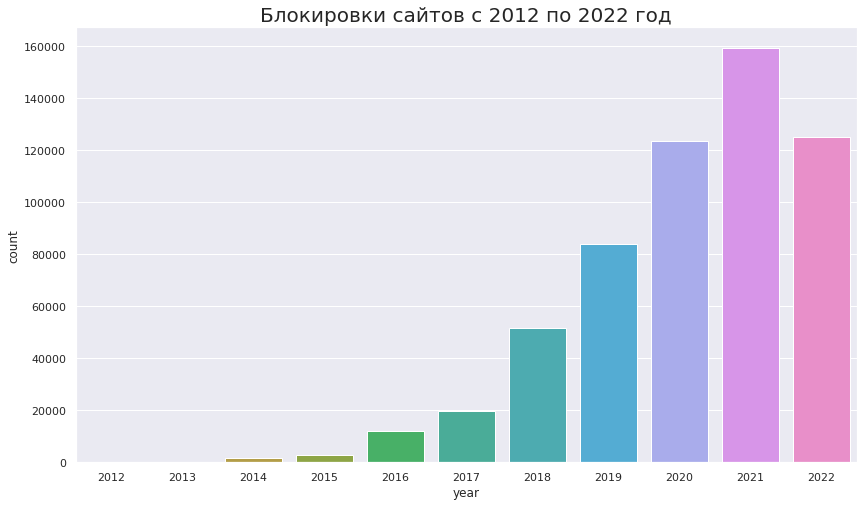

In [4]:
sns.countplot(
    data=data,
    x='year',
).set_title('Блокировки сайтов c 2012 по 2022 год', fontsize=20);

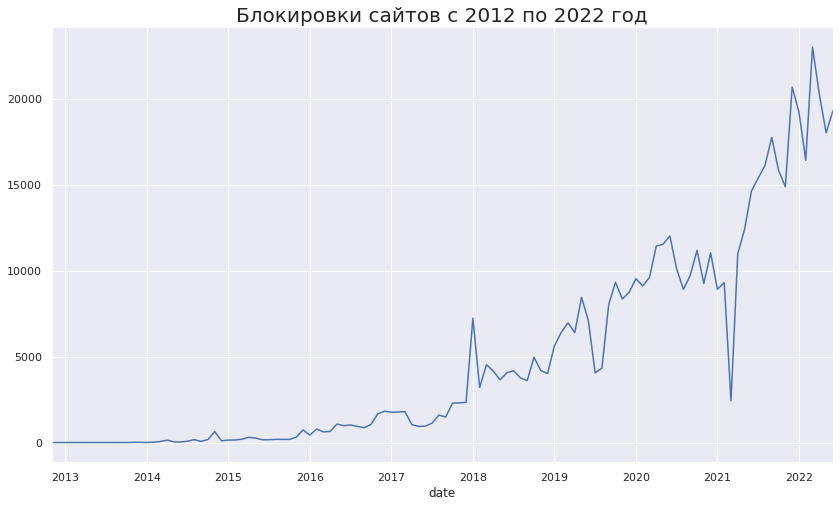

In [22]:
# same but lineplot
(data[data.date <= '2022-06-30'].set_index('date')
     .site
     .resample('m')
     .count()
     .plot()
     .set_title('Блокировки сайтов c 2012 по 2022 год', fontsize=20));

In [39]:
data[data.date <= '2022-06-30'].set_index('date').site.resample('m').count().to_csv('gr_1.csv')

In [31]:
# sns.lineplot(
#     data=data.groupby('year').size(),
# ).set_title('Блокировки сайтов c 2012 по 2022 год', fontsize=20);

In [6]:
data[data.year == 2022]

,date,site,who_blocked,count_of_blocked_domains,year,month
0,2022-07-15,piratebayproxy.autos,Минкомсвязь,0,2022,7
1,2022-07-15,plan-a.guru,Генпрокуратура,0,2022,7
2,2022-07-15,nu15.kinovod.cam,Минкомсвязь,0,2022,7
3,2022-07-15,mega-pesni.one,Минкомсвязь,0,2022,7
4,2022-07-15,thepiratebay.gg,Минкомсвязь,0,2022,7
...,...,...,...,...,...,...
388,2022-01-02,vsecasino12.com,ФНС,0,2022,1
389,2022-01-02,levos-winning.xyz,ФНС,0,2022,1
390,2022-01-02,jocazzina-men.top,ФНС,0,2022,1
391,2022-01-02,www.1xbetbookie.top,ФНС,0,2022,1


Насколько весна 2022 года нетипичная видно в блокировках по месяцам за все годы. За обычно блокировали не более 10 тысяч сайтов. В 2022 году цифра заблокированных сайтов не опускалась ниже 15 тысяч. А в марте и вовсе был месячный максимум за всё время ~27000 заблокированных сайтов.

In [42]:
temp = data[(data.year >= 2018)].groupby(['year', 'month']).size().reset_index().sort_values(by=['year', 'month'], ascending=True) #  & (data.month <= 6) & (data.who_blocked == 'Генпрокуратура')
temp.columns = ['year', 'month', 'count'] 

In [43]:
temp.to_csv('gr_2.csv')

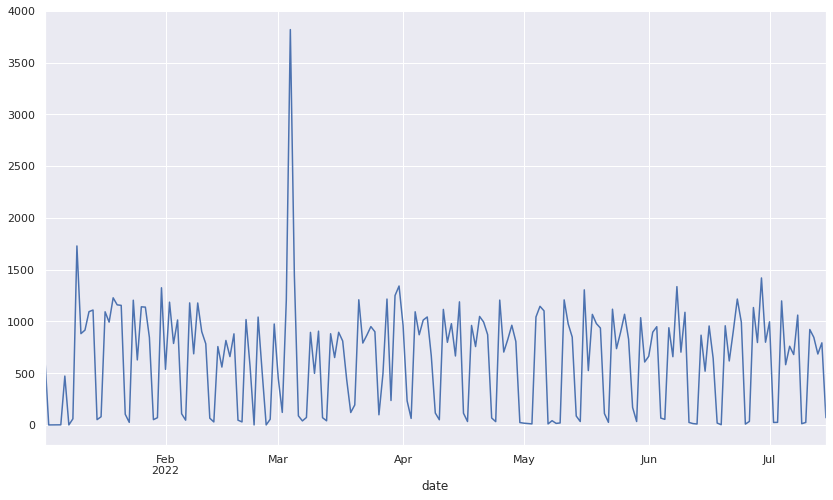

In [7]:
data[data.year==2022].set_index('date').resample('d').site.count().plot();

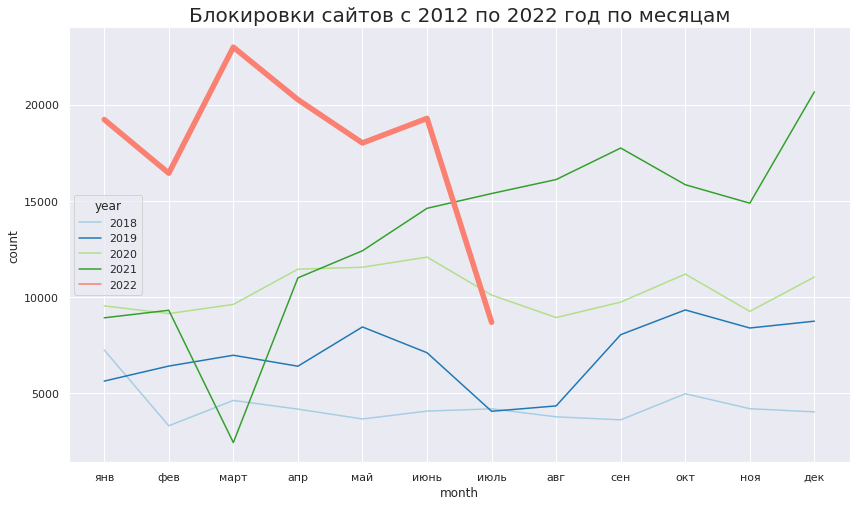

In [30]:
sns.lineplot(
    data=temp[temp.year!=2022],
    x='month',
    y='count',
    hue='year',
    palette="Paired",
)

sns.lineplot(
    data=temp[temp.year==2022],
    x='month',
    y='count',
    linewidth=5.5,
    hue='year',
    palette="dark:salmon_r",
).set_title('Блокировки сайтов c 2012 по 2022 год по месяцам', fontsize=20);

plt.xticks(range(1, 13), ['янв', 'фев', 'март', 'апр', 'май', 'июнь', "июль", 'авг', "сен", "окт" , "ноя", "дек"])
plt.show()

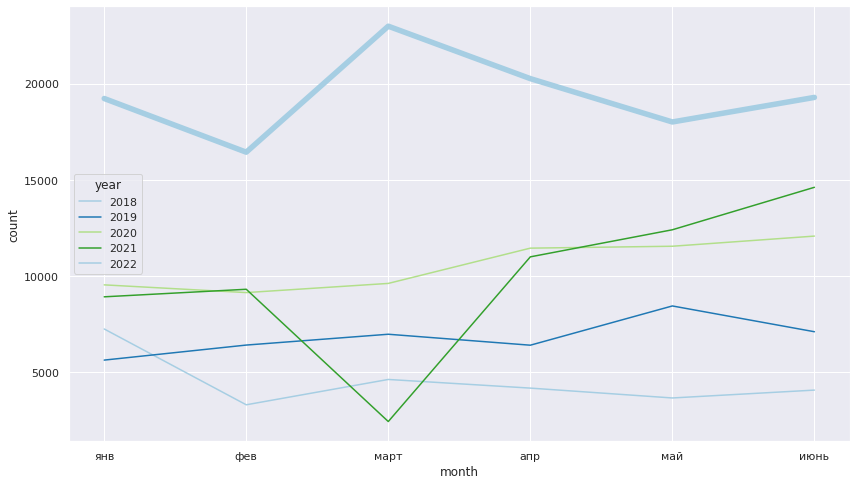

In [141]:
# Тот же график, но с отрезком за 6 месяцев
sns.lineplot(
    data=temp[(temp.month <= 6) & (temp.year!=2022)],
    x='month',
    y='count',
    hue='year',
    palette="Paired"
)

sns.lineplot(
    data=temp[(temp.month <= 6) & (temp.year==2022)],
    x='month',
    y='count',
    hue='year',
    linewidth=5.5,
    palette="Paired"
)

plt.xticks(range(1, 7), ['янв', 'фев', 'март', 'апр', 'май', 'июнь'])
plt.show()

In [46]:
# (
#     data[data.year == 2022].set_index('date')
#     .resample('m')
#     .site
#     .size()
#     .plot(kind='bar')

# )

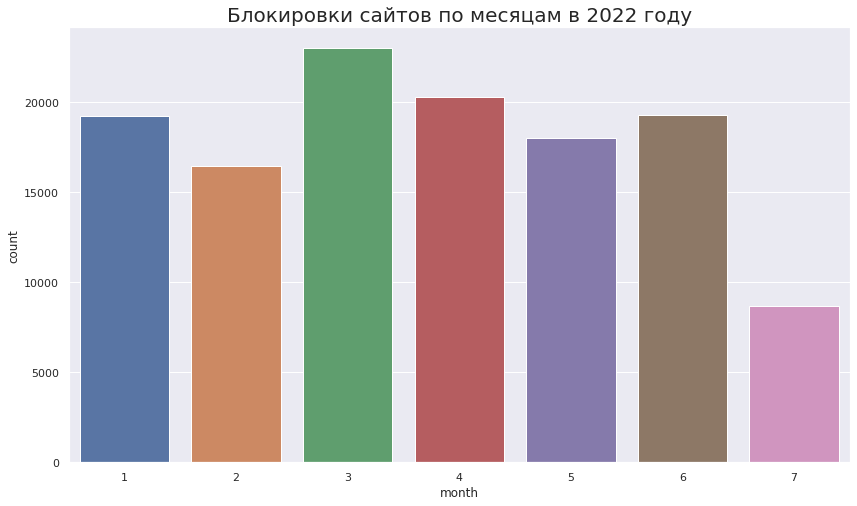

In [39]:
sns.countplot(
    data=data[data.year == 2022],
    x='month'
).set_title('Блокировки сайтов по месяцам в 2022 году', fontsize=20);

На пике в апреле этого года  в реестр внесли 22 991 сайтов.

In [27]:
data[data.year == 2022].groupby('month').size()[3]

22991

In [26]:
(22991 - 9609) / 22991 * 100

58.205384715758335

In [28]:
data[data.year == 2021].groupby('month').size()[3]

2424

In [29]:
data[data.year == 2020].groupby('month').size()[3]

9609

Всего за этот год заблокировано 124 893 сайта

In [12]:
data[data.year == 2022].groupby('month').size().sum()

124893

В среднем в месяц в России блокируют 17 841 сайтов

In [13]:
data[data.year == 2022].groupby('month').size().mean()

17841.85714285714

Или ~594 сайта в день

In [14]:
data[data.year == 2022].groupby('month').size().mean() // 30

594.0

Ещё проверим на сколько в абсолютных числах блокировок в этом году больше.

Если предположить, что цифра пиратских, порнографических сайтов и площадок по продаже наркотиков год от года меняется не сильно. То разницу в блокировках можно отнести к военной цензуре. Тогда количество заблокированных сайтов из-за войны равно:

In [162]:
num_blocked_2022 = data[(data.year == 2022) & (data.month <= 6)].groupby('month').size().sum()
for y in range(2019, 2022):
    num_blocked = data[(data.year == y) & (data.month <= 6)].groupby('month').size().sum()
    print(f'Абсолютная разница между {y} и 2022 годом: {num_blocked}')

Абсолютная разница между 2019 и 2022 годом: 40915
Абсолютная разница между 2020 и 2022 годом: 63333
Абсолютная разница между 2021 и 2022 годом: 58641


In [163]:
num_blocked_2022

116213

В реестре также указано, кто инициировал блокировку того или иного сайта. Можно посчитать по чьей инициативе заблокировали больше всего сайтов. Но тут 2022 год выглядит примерно также как и прошлые годы. 

In [13]:
# кол-во блокировок по ведомствам за 2022 год
data[data.year == 2022].groupby('who_blocked', as_index=False).size().sort_values(by='size', ascending=False).head(10)

,who_blocked,size
1499,ФНС,39735
869,Мосгорсуд,13667
247,Генпрокуратура,12362
845,Минкомсвязь,6012
1208,Роскомнадзор,5523
792,МВД,4913
1207,Росздравнадзор,3591
396,Зареченский районный суд г.Тулы - Тульская обл...,3256
1193,РАР,1609
667,Куйбышевский районный суд г. Омска - Омская об...,520


In [14]:
# кол-во блокировок по ведомствам с 2012 по 2021 годы
data[data.year != 2022].groupby('who_blocked', as_index=False).size().sort_values(by='size', ascending=False).head(10)

,who_blocked,size
1895,ФНС,220426
326,Генпрокуратура,42558
1048,Минкомсвязь,32000
2113,суд,25519
1076,Мосгорсуд,23262
1517,Роскомнадзор,18679
993,МВД,14471
1516,Росздравнадзор,4917
1495,РАР,2093
1748,Таганский районный суд - Москва,1070


In [53]:
# doubles_data = data[data.year == 2022].groupby('site').size().sort_values(ascending=False).reset_index()
# doubles_data.columns.values[1] = 'count_of_blocks'

# doubles_data[doubles_data.site.str.contains('mediazona')]

**Вопросы к экспертам РКН:**
* Чем блокировки в 2022 году отличаются от блокировок в прошлом?
* В реестре десятки тысяч разных сайтов. Если не учитывать политические сайты и медиа, то что это сайты?
    * Какой примерно процент в реестре это независимые медиа, сайты с критикой Путина и т.д.?
    * Многие сайты создают множество зеркал. Можно ли подсчитать сколько их уже в реестре? Можно ли ими объяснить скачок блокировок в этом году?
    * Как в реестре можно  отличить блокировку по причине военной цензуры от других причин?
    * Сколько уже приблизительно заблокировано сайтов из-за военной цензуры?
* Чем отличаются блокировки от РКН, судов, ФНС, генпрокуратуры и т.д?
* Скачок блокировок был и в прошлом году весной. Что тогда произошло? Это блокировки связанные с протестами за Навального? 

**Материалы о блокировках:**

- [Военной цензуре подверглось более 3000 сайтов](https://roskomsvoboda.org/post/voennaya-cenzura-3000-saytov/)
- [Военной цензурой накрыло более 5000 сайтов](https://roskomsvoboda.org/post/voen-cenzura-5300-saytov/)
- [Военной цензуре подверглось более 1500 сайтов](https://roskomsvoboda.org/post/ban-1500-ssylok/)
- [«Репортеры без границ»: в России введена военная цензура](https://roskomsvoboda.org/post/rf-155-rsf-rating/)
- [Индекс свободы слова от RSE](https://rsf.org/en/index)
    - [Описание методологии](https://rsf.org/en/index-methodologie-2010?year=2010&data_type=general)


**RSF reports**

In [30]:
import requests
import io
from tqdm.notebook import tqdm

In [31]:
df = None
for y in tqdm(range(2002, 2023)):
    req = requests.get(f'https://rsf.org/sites/default/files/import_classement/{y}.csv').content
    if df is None:
        df = pd.read_csv(io.StringIO(req.decode('utf-8')), delimiter=';')
        continue
    try:
        if y == 2022:
            df_2022 = pd.read_csv(io.StringIO(req.decode('utf-8')), delimiter=';', )
        else:
            temp_df = pd.read_csv(io.StringIO(req.decode('utf-8')), delimiter=';')
            df = pd.concat([df, temp_df])
    except Exception as e:
        print(e, y)

df_2022.to_csv('index_rsf_2022.csv')
df.to_csv('index_rsf_2002-2021.csv')

  0%|          | 0/21 [00:00<?, ?it/s]

Error tokenizing data. C error: Expected 1 fields in line 7, saw 5
 2011


In [32]:
df_2022['year'] = 2022
df_2022 = df_2022.filter(['ISO', 'Score', 'Rank', 'year'])
df_2022.columns = df_2022.columns.str.lower()

In [33]:
df = df.filter(df.columns[:4])
df.rename(columns = {'Year (N)':'year', 'ISO':'iso',
                              'Rank N':'rank', 'Score N':'score'}, inplace = True)

In [34]:
df_full = pd.concat([df, df_2022])

In [35]:
df_rus = df_full[df_full.iso == 'RUS'].reset_index()
df_rus.drop('index', axis=1, inplace=True)
df_rus.loc[9, 'year'] = 2011
df_rus['year'] = df_rus['year'].astype(int)
df_rus['rank'] = df_rus['rank'].astype(int)
df_rus['score'] = df_rus['score'].str.replace(',', '.').astype(float)

In [36]:
# значения из csv выгрузки за 2022 год не совпадают с данными на сайте
df_rus.loc[19, 'rank'] = 155
df_rus.loc[19, 'score'] = 38.82

In [37]:
df_rus

,year,iso,rank,score
0,2002,RUS,121,48.000
1,2003,RUS,148,49.500
2,2004,RUS,140,51.380
3,2005,RUS,138,48.670
4,2006,RUS,147,52.500
5,2007,RUS,144,56.900
6,2008,RUS,141,47.500
7,2009,RUS,153,60.875
8,2010,RUS,140,49.900
9,2011,RUS,142,66.000


In [38]:
df_rus.to_csv('index_rsf_russia_2002-2021.csv', index=False)

In [57]:
df_rus = pd.read_csv('index_rsf_russia_2002-2021.csv', index_col=0)

In [59]:
df_rus['rank'] = df_rus['rank'] * -1
df_rus.drop(['score', 'iso'], axis=1).to_csv('gr_3.csv')

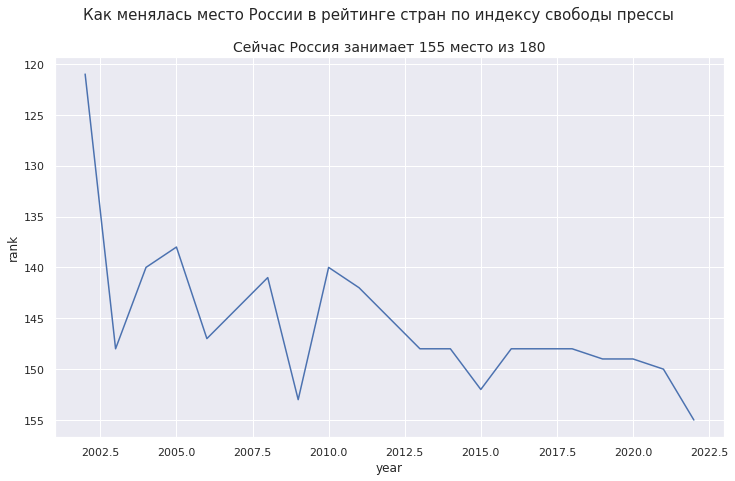

In [50]:
sns.lineplot(
    data=df_rus,
    x='year',
    y='rank'
).invert_yaxis()

plt.suptitle("Как менялась место России в рейтинге стран по индексу свободы прессы", fontsize=15)
plt.title('Сейчас Россия занимает 155 место из 180', fontsize=14)
plt.show()

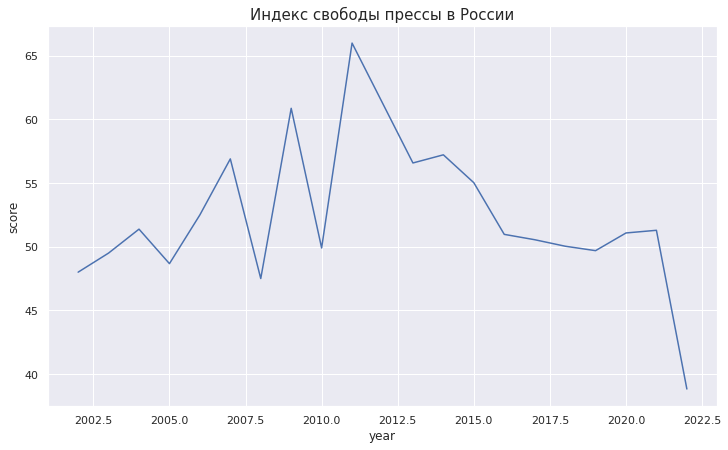

In [40]:
sns.lineplot(
    data=df_rus,
    x='year',
    y='score'
)

plt.title('Индекс свободы прессы в России', fontsize=15)
plt.show()

**Преследование журналистов**

 CPJ's annual census is a snapshot of those imprisoned at midnight on December 1 each year. It does not include those jailed and released throughout the year. 

In [79]:
df = pd.DataFrame(columns=['organizations', 'fullName', 'location', 'status', 'typeOfDeath', 'charges', 'startDisplay', 'mtpage', 'country', 'type', 'motiveConfirmed', 'year_of_inprisoned'])
for year in tqdm(range(2000, 2022)):
        url = f'https://datamanager.cpj.org/api/datamanager/reports/entries?distinct(personId)&includes=organizations,fullName,location,status,typeOfDeath,charges,startDisplay,mtpage,country,type,motiveConfirmed&sort=fullName&pageNum=1&pageSize=20&in(status,%27Imprisoned%27)&in(cc_fips,%27RS%27)&eq(year,{year})'
        data = requests.get(url).json()
        for val in data['data']:
            new_rows = pd.Series(val).to_frame().T
            new_rows['year_of_inprisoned'] = year
            df = pd.concat([new_rows, df], ignore_index=True)

  0%|          | 0/22 [00:00<?, ?it/s]

In [86]:
df.head()

,organizations,fullName,location,status,typeOfDeath,charges,startDisplay,mtpage,country,type,motiveConfirmed,year_of_inprisoned
0,"Rosderzhava, Ya.N.",Yan Katelevskiy,Moscow,Imprisoned,None,Retaliatory,"July 29, 2020",https://cpj.org/data/people/yan-katelevskiy/,Russia,Journalist,None,2021
1,Radio Free Europe/Radio Liberty,Vladislav Yesypenko,"Simferopol, Crimea",Imprisoned,None,Retaliatory,"In Occupied Crimea on March 10, 2021",https://cpj.org/data/people/vladislav-yesypenko/,Russia,Journalist,None,2021
2,DOXA,Vladimir Metelkin,Moscow,Imprisoned,None,Anti-state,"April 14, 2021",https://cpj.org/data/people/vladimir-metelkin/,Russia,Journalist,None,2021
3,Freelance,Rustem Sheikhaliev,Rostov-on-Don,Imprisoned,None,Anti-state,"In Occupied Crimea on March 27, 2019",https://cpj.org/data/people/rustem-sheikhaliev/,Russia,Journalist,None,2021
4,Grani,Remzi Bekirov,Rostov-on-Don,Imprisoned,None,Anti-state,"In Occupied Crimea on March 27, 2019",https://cpj.org/data/people/remzi-bekirov/,Russia,Journalist,None,2021


Россия находится на восьмой строчке. На данным момент, согласно отчету CPJ, 14 работников СМИ лишены свободы. «Правительства полны решимости контролировать информацию и управлять ею, и они становятся все более наглыми в своих усилиях», — заявил исполнительный директор CPJ Джоэл Саймон. 

Он отметил, что «сажать журналистов за освещение событий — отличительная черта авторитарного режима». 

Источник: [Новая газета](https://novayagazeta.ru/articles/2021/12/09/komitet-po-zashchite-zhurnalistov-293-zhurnalista-po-vsemu-miru-ostaiutsia-v-zakliuchenii-za-svoiu-rabotu-eto-maksimum-za-vse-vremia-news)

In [87]:
df.to_csv('imprisoned_journalist_in_russia.csv', index=False)

In [88]:
df.startDisplay = df.startDisplay.str.replace('In Occupied Crimea on ', '')

In [89]:
df.startDisplay = pd.to_datetime(df.startDisplay)

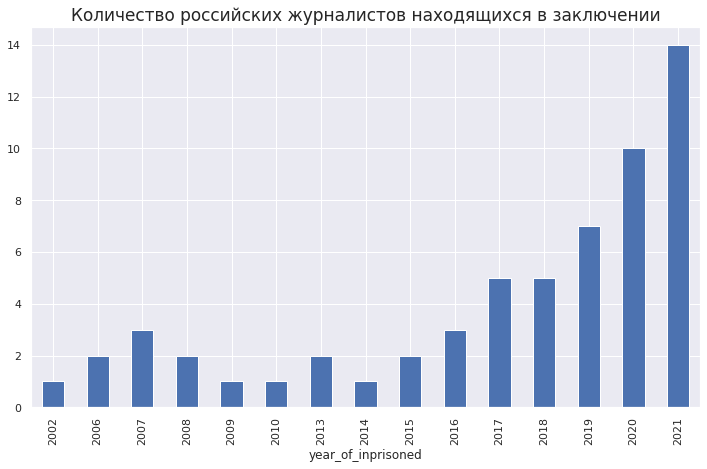

In [117]:
df.groupby('year_of_inprisoned').size().plot(kind='bar')
# plt.xticks(np.unique(df.year_of_inprisoned).tolist())
plt.title('Количество российских журналистов находящихся в заключении', fontsize=17);

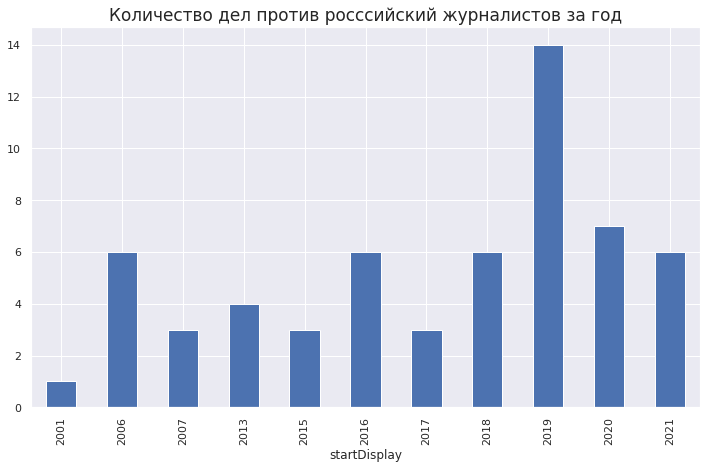

In [116]:
df.groupby(df.startDisplay.dt.year).size().plot(kind='bar')
plt.title('Количество дел против росссийский журналистов за год', fontsize=17);